In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path = 'C:\\Users\\WIN10\\Desktop\\ex0.txt'

In [111]:
dataSet = pd.read_table(path,header = None)
dataSet.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [112]:
def getMat(dataSet):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [113]:
def LWLR(testMat,xMat,yMat,k=1.0):
    n = testMat.shape[0]
    m = xMat.shape[0]
    weights = np.mat(np.eye(m))
    yHat = np.zeros(n)
    for i in range(n):
        for j in range(m):
            diffMat = testMat[i] - xMat[j]
            weights[j,j] = np.exp(diffMat*diffMat.T/(-2*k**2))
        xTx = xMat.T*(weights*xMat)
        ws = xTx.I*(xMat.T*(weights*yMat))
        yHat[i] = testMat[i]*ws
    return yHat

In [119]:
X,y = getMat(dataSet)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 20)
srtInd = X_test[:,1].argsort(0)
xSort = X_test[srtInd][:,0]

In [124]:
yHat1 = LWLR(X_test,X_train,y_train,k = 1.0)
yHat2 = LWLR(X_test,X_train,y_train,k = 0.01)
fig = plt.figure(figsize = (6,8))
fig1 = fig.add_subplot(211)
plt.scatter(X_test[:,1].A,y_test,c = 'b')
plt.plot(xSort[:,1].A,yHat1[srtInd],linewidth = 1,color = 'r')
fig1 = fig.add_subplot(212)
plt.scatter(X_test[:,1].A,y_test,c = 'b')
plt.plot(xSort[:,1].A,yHat2[srtInd],linewidth = 1,color = 'r')

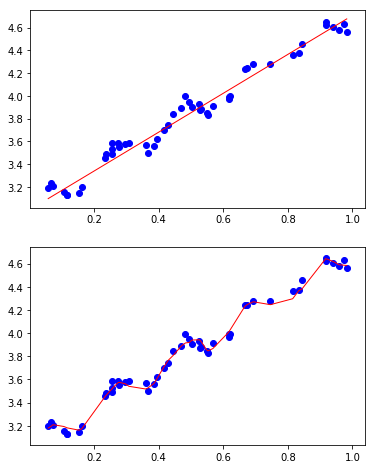

In [125]:
plt.show()